# Spatial Filtering in Image Processing

## Introduction
* Spatial filtering is a technique used in image processing to enhance or suppress specific features of an image. 
* It involves applying a filter (kernel) to the image, which is a small matrix that slides over the image and performs operations such as **blurring**, **sharpening**, and **edge detection**.

In this notebook, we'll explore basic and advanced spatial filters.


## import Necessary Libraries

In [2]:
import cv2;
import numpy as np;
import matplotlib.pyplot as plt;

----

## Basics of Spatial Filtering (Convolution)

In [68]:
# 5x5 image
img = np.array([[5, 2, 6, 1, 5],
                [8, 1, 5, 7, 3],
                [1, 0, 3, 7, 2],
                [8, 4, 2, 6, 7],
                [3, 8, 4, 7, 3]])

# A random kernel
kernel = np.array([[0, 1, 0],
                   [1, 0, 1],
                   [0, 1, 0]]);

In [69]:
## Create an image with the same dimensions as the original image and initialize it with zeros
filter_img = np.zeros_like(img);
filter_img

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

* Because the filter size is 3x3, the first and last rows and columns of the image will be skipped in the filtered image
* We will start applying the filter from index (1,1) in the original image and fill the resulting value in the filtered image, starting at index (1,1)



In [72]:
filter_img[1,1] = np.sum(img[0:3, 0:3] * kernel);

print("Local Region : \n", img[0:3, 0:3], end='\n\n');
print("kernel : \n", kernel, '\n')
print("Fitler Image : \n", filter_img)

Local Region : 
 [[5 2 6]
 [8 1 5]
 [1 0 3]]

kernel : 
 [[0 1 0]
 [1 0 1]
 [0 1 0]] 

Fitler Image : 
 [[ 0  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


In [73]:
filter_img[1,2] = np.sum(img[0:3, 1:4] * kernel);
filter_img[1,3] = np.sum(img[0:3, 2:5] * kernel);
filter_img[2,1] = np.sum(img[1:4, 0:3] * kernel);
filter_img[2,2] = np.sum(img[1:4, 1:4] * kernel);
filter_img[2,3] = np.sum(img[1:4, 2:5] * kernel);
filter_img[3,1] = np.sum(img[2:5, 0:3] * kernel);
filter_img[3,2] = np.sum(img[2:5, 1:4] * kernel);
filter_img[3,3] = np.sum(img[2:5, 2:5] * kernel);

In [74]:
filter_img

array([[ 0,  0,  0,  0,  0],
       [ 0, 15, 17, 16,  0],
       [ 0,  9, 14, 18,  0],
       [ 0, 18, 17, 23,  0],
       [ 0,  0,  0,  0,  0]])

----

### Using for loop for the convolution operation

In [76]:
# Create an 8x8 array (grayscale image)
img = np.array([[5, 2, 3, 8, 5, 6, 9, 7],
                  [1, 7, 8, 5, 6, 3, 4, 9],
                  [4, 9, 6, 1, 4, 8, 5, 2],
                  [7, 3, 2, 6, 7, 9, 1, 4],
                  [3, 8, 9, 3, 1, 2, 8, 7],
                  [4, 1, 6, 8, 5, 3, 9, 2],
                  [2, 6, 3, 7, 9, 1, 4, 5],
                  [3, 5, 4, 2, 6, 8, 7, 3]])

In [77]:
# Define a simple 3x3 kernel (for example, an averaging filter)
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9  # Averaging kernel

In [78]:
## Create an image with the same dimensions as the original image and initialize it with zeros
filter_img = np.zeros_like(img);

## Rows and Columns of Original Image
rows, cols = img.shape

## Convolution operation
for i in range(1, rows-1):
    for j in range(1, cols-1):
        local_region = img[i-1:i+2, j-1:j+2];
        product = local_region*kernel;
        sum_of_product = np.sum(product);
        filter_img[i,j] = sum_of_product;

In [79]:
filter_img

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 5, 5, 5, 5, 5, 0],
       [0, 5, 5, 5, 5, 5, 5, 0],
       [0, 5, 5, 4, 4, 5, 5, 0],
       [0, 4, 5, 5, 4, 5, 5, 0],
       [0, 4, 5, 5, 4, 4, 4, 0],
       [0, 3, 4, 5, 5, 5, 4, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

---

## Padding
* Padding is a technique used in image processing to add a border of zeros (or other values) around an image.
* The padding applied around an image depends on the size of the filter (kernel) being used.

​$$ P = \frac{K-1}{2}  $$

#### Where:
* 𝑃 is the padding size.
* 𝐾 is the size of the kernel (filter).
#### Example:
* If the kernel is 3×3, then
$$ P = \frac{3-1}{2} = 1 $$
So, you add 1 pixel of padding to each side of the image.

* If the kernel is 5×5, then
$$ P = \frac{5-1}{2} = 2 $$
So, you add 2 pixels of padding to each side.

In [80]:
img = np.array([[5, 2, 3, 8, 5, 6, 9, 7],
                [1, 7, 8, 5, 6, 3, 4, 9],
                [4, 9, 6, 1, 4, 8, 5, 2],
                [7, 3, 2, 6, 7, 9, 1, 4],
                [3, 8, 9, 3, 1, 2, 8, 7],
                [4, 1, 6, 8, 5, 3, 9, 2],
                [2, 6, 3, 7, 9, 1, 4, 5],
                [3, 5, 4, 2, 6, 8, 7, 3]])

In [85]:
# Manual padding

r, c = img.shape
padded_img = np.zeros((r+2, c+2));
padded_img[1:-1, 1:-1] = img

In [86]:
padded_img

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 5., 2., 3., 8., 5., 6., 9., 7., 0.],
       [0., 1., 7., 8., 5., 6., 3., 4., 9., 0.],
       [0., 4., 9., 6., 1., 4., 8., 5., 2., 0.],
       [0., 7., 3., 2., 6., 7., 9., 1., 4., 0.],
       [0., 3., 8., 9., 3., 1., 2., 8., 7., 0.],
       [0., 4., 1., 6., 8., 5., 3., 9., 2., 0.],
       [0., 2., 6., 3., 7., 9., 1., 4., 5., 0.],
       [0., 3., 5., 4., 2., 6., 8., 7., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [88]:
## Using built-in function

padded_img = np.pad(img, 1);
padded_img

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 2, 3, 8, 5, 6, 9, 7, 0],
       [0, 1, 7, 8, 5, 6, 3, 4, 9, 0],
       [0, 4, 9, 6, 1, 4, 8, 5, 2, 0],
       [0, 7, 3, 2, 6, 7, 9, 1, 4, 0],
       [0, 3, 8, 9, 3, 1, 2, 8, 7, 0],
       [0, 4, 1, 6, 8, 5, 3, 9, 2, 0],
       [0, 2, 6, 3, 7, 9, 1, 4, 5, 0],
       [0, 3, 5, 4, 2, 6, 8, 7, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

### Convolution

In [93]:
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

In [94]:
## Create an image with the same dimensions as the original image and initialize it with zeros
filter_img = np.zeros_like(img);

## Rows and Columns of Original Image
rows, cols = img.shape

## Convolution operation
for i in range(rows):
    for j in range(cols):
        local_region = padded_img[i:i+3, j:j+3];
        product = local_region*kernel;
        sum_of_product = np.sum(product);
        filter_img[i,j] = sum_of_product;

In [95]:
filter_img

array([[ -9,  -5,  -4,   0,   4,  -2,  -7,  13],
       [-18,  -7,   4,   2,  -3,  -3,  -1,  18],
       [-19,  -4,   7,  -1,  -8,   7,   5,  10],
       [-20,  -3,  10,   5,  -9,  -2,   6,  14],
       [-12,  -3,  -5,   4,   3,  -5,   1,  18],
       [-15,  -9,  -3,   3,  12,  -6,  -8,  21],
       [-12,  -4,  -5,  -7,   5,   0,   2,  20],
       [-11,  -2,   2,  -8,   0,   4,   1,  11]])

In [96]:
print("Original Image Shape : ", img.shape);
print("Filter Image Shape : ", filter_img.shape)

Original Image Shape :  (8, 8)
Filter Image Shape :  (8, 8)


----

## Convolution on Digital Images

### Box Kernel

In [109]:
image = cv2.imread(r"images\Fig0333(a)(test_pattern_blurring_orig).tif", 0)

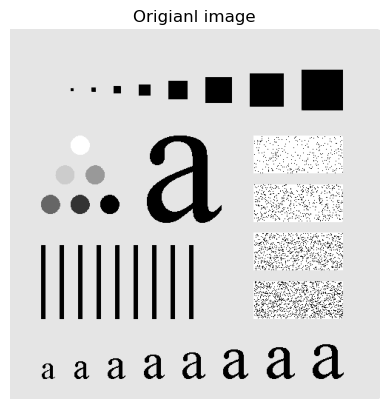

In [110]:
plt.imshow(image, 'gray');
plt.title("Origianl image");
plt.axis('off');
plt.show();

In [111]:
# 3x3 box filter
box_kernel = np.array([[1,1,1],
                       [1,1,1],
                       [1,1,1]])/9;

In [124]:
## Convolution

padded_img = np.pad(image, 1);
filter_img = np.zeros_like(img);

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        local_region = padded_img[i:i+3, j:j+3];
        product = local_region*box_kernel;
        sum_of_product = np.sum(product);
        filter_img[i,j] = sum_of_product;

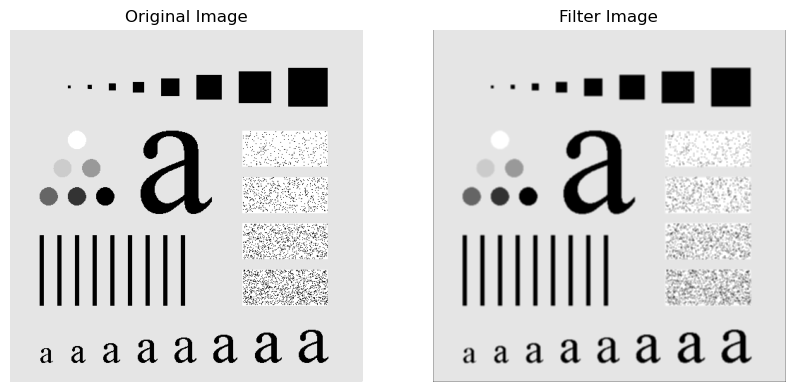

In [125]:
fig, axs = plt.subplots(1, 2, figsize=(10,10));

axs[0].imshow(image, 'gray');
axs[0].set_title("Original Image");
axs[0].axis('off');
axs[1].imshow(filter_img, 'gray');
axs[1].set_title("Filter Image");
axs[1].axis('off');
plt.show();

### Using Box Kernel of size 11x11

In [132]:
## Using 11x11 box kernel

kernel_11 = np.ones((11,11))/121;     ### 11*11 => 121

In [135]:
## Convolution
## As the kernel shape is 11x11 so,,,    P = (11-1)/2 = 5
padded_img = np.pad(image, 5);
filter_img_11 = np.zeros_like(img);

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        local_region = padded_img[i:i+11, j:j+11];
        product = local_region*kernel_11;
        sum_of_product = np.sum(product);
        filter_img_11[i,j] = sum_of_product;

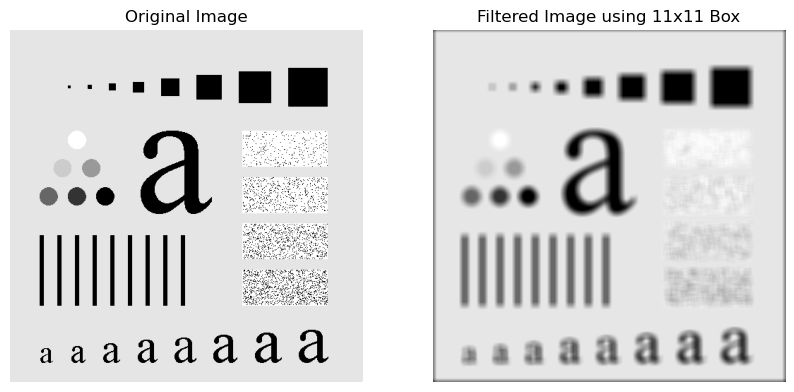

In [136]:
fig, axs = plt.subplots(1, 2, figsize=(10,10));

axs[0].imshow(image, 'gray');
axs[0].set_title("Original Image");
axs[0].axis('off');
axs[1].imshow(filter_img_11, 'gray');
axs[1].set_title("Filtered Image using 11x11 Box");
axs[1].axis('off');
plt.show();

---

### Median Filter

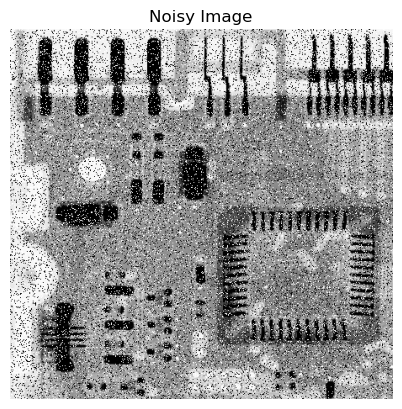

In [138]:
image = cv2.imread(r"images\Fig0335(a)(ckt_board_saltpep_prob_pt05).tif", 0);

plt.imshow(image, 'gray');
plt.title("Noisy Image");
plt.axis('off');
plt.show();

In [139]:
filter_size = 7

padded_image = np.pad(image, 3)    ## P = (7-1)/2

# Initialize output image (same size as original image)
output_image = np.zeros_like(image)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        neighborhood = padded_image[i:i+filter_size, j:j+filter_size]
        output_image[i, j] = np.median(neighborhood)

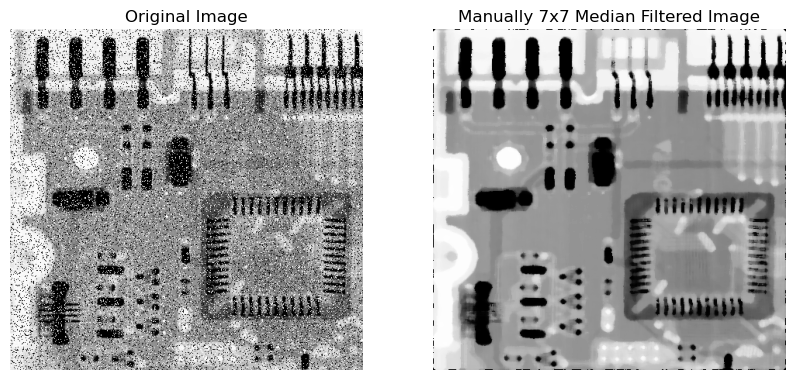

In [142]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title("Manually 7x7 Median Filtered Image")
plt.axis('off')

plt.show()